In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

# To read xlsx:
#!pip install openpyxl

# 1. Exploratory analysis:

In [35]:
#import training dataset

# To read the date column correctly, we can use the argument parse_dates to specify a list of date columns.
train_data = pd.read_csv('train_2016.csv', parse_dates=["transactiondate"]) 
properties_data = pd.read_csv('properties_2016.csv',low_memory=False)

In [36]:
train_data.head()

,parcelid,logerror,transactiondate
0,11016594,0.028,2016-01-01
1,14366692,-0.168,2016-01-01
2,12098116,-0.004,2016-01-01
3,12643413,0.022,2016-01-02
4,14432541,-0.005,2016-01-02


In [37]:
properties_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.000e+00,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.752e+04,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1.413e+06,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1.157e+06,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,4.335e+05,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [38]:
dict_data = pd.read_excel('zillow_data_dictionary.xlsx')
dict_data

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [39]:
#shape of the data
print ("Shape of the train_2016 dataset:",train_data.shape)
print ("Shape of the properties_2016 dataset:",properties_data.shape)

Shape of the train_2016 dataset: (90275, 3)
Shape of the properties_2016 dataset: (2985217, 58)


### -> Since train dataset has 90275 row and properties has 2985217 rows, let's merge the dataset together.

In [40]:
# left join these 2 tables:
merged_train_data = pd.merge(train_data,properties_data,on="parcelid",how="left")

In [41]:
merged_train_data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.028,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037e+13
1,14366692,-0.168,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.004,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037e+13
3,12643413,0.022,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037e+13
4,14432541,-0.005,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059e+13


In [42]:
print ("Shape of the merged_2016 dataset:",merged_train_data.shape)

Shape of the merged_2016 dataset: (90275, 60)


## 1.1 Descriptive Statistics

In [43]:
data = merged_train_data
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = data.describe()
print(description)

        parcelid   logerror  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
count  9.028e+04  90275.000              28781.000                   261.000        43.000   
mean   1.298e+07      0.011                  1.816                     7.230       713.581   
std    2.505e+06      0.161                  2.974                     2.716       437.434   
min    1.071e+07     -4.605                  1.000                     2.000       100.000   
25%    1.156e+07     -0.025                  1.000                     7.000       407.500   
50%    1.255e+07      0.006                  1.000                     7.000       616.000   
75%    1.423e+07      0.039                  1.000                     7.000       872.000   
max    1.630e+08      4.737                 13.000                    21.000      1555.000   

       bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  calculatedbathnbr  \
count    90275.000   90275.000                 16.0     

## 1.2 Non Numerical Data:

In [44]:
data_type = merged_train_data.dtypes.reset_index()
data_type.columns = ["Count", "Data Type"]
data_type.groupby("Data Type").aggregate('count').reset_index()

,Data Type,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


In [45]:
data_type.loc[data_type['Data Type'] == 'object']

,Count,Data Type
24,hashottuborspa,object
34,propertycountylandusecode,object
36,propertyzoningdesc,object
51,fireplaceflag,object
57,taxdelinquencyflag,object


In [46]:
# store labels of all numerical varibales:
cate_X = data_type.loc[data_type['Data Type'] == 'object']
categorical_features = cate_X['Count'].values
categorical_features

array(['hashottuborspa', 'propertycountylandusecode',
       'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag'],
      dtype=object)

### -> We found couple non-numerical data entries. We will deal with those features automatically later by using CatBoost.

## 1.3 Plots of y: 

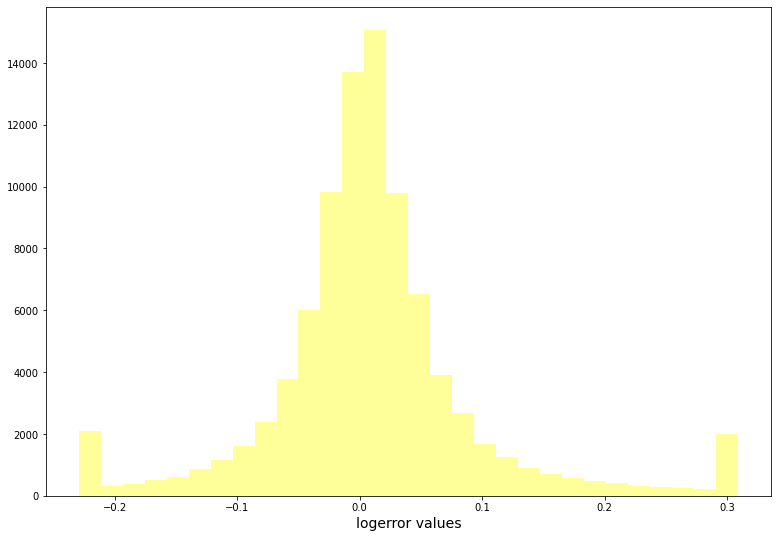

In [47]:
# Distribution of y (outlier if any):

import warnings
warnings.filterwarnings('ignore')
merged_train_data['logerror'].loc[merged_train_data['logerror']>np.percentile(merged_train_data.logerror.values, 98)] = np.percentile(merged_train_data.logerror.values, 98)
merged_train_data['logerror'].loc[merged_train_data['logerror']<np.percentile(merged_train_data.logerror.values, 2)] = np.percentile(merged_train_data.logerror.values, 2)

plot.figure(figsize=(13,9))
sns.distplot(merged_train_data.logerror.values,kde=False,color='yellow', bins=30)
plot.xlabel('logerror values', fontsize=14)
plot.show()

### -> We can see from graph above, it is a very good normal distribution. Since logerror = log(Zestimate) - log(actual price), negative logerror value means Zestimate underestimated, positive value means Zestimate overestimated. We can see from this normal distribution, it estimates pretty accurate most of the time. 
### -> In my fitted model, we need to find out when Zesimate does well and when it doesn't. 

# 2. Feature Engineering

## 2.1 Deal with missing data:
### * Of course, if we have more time, we can do more on this. 

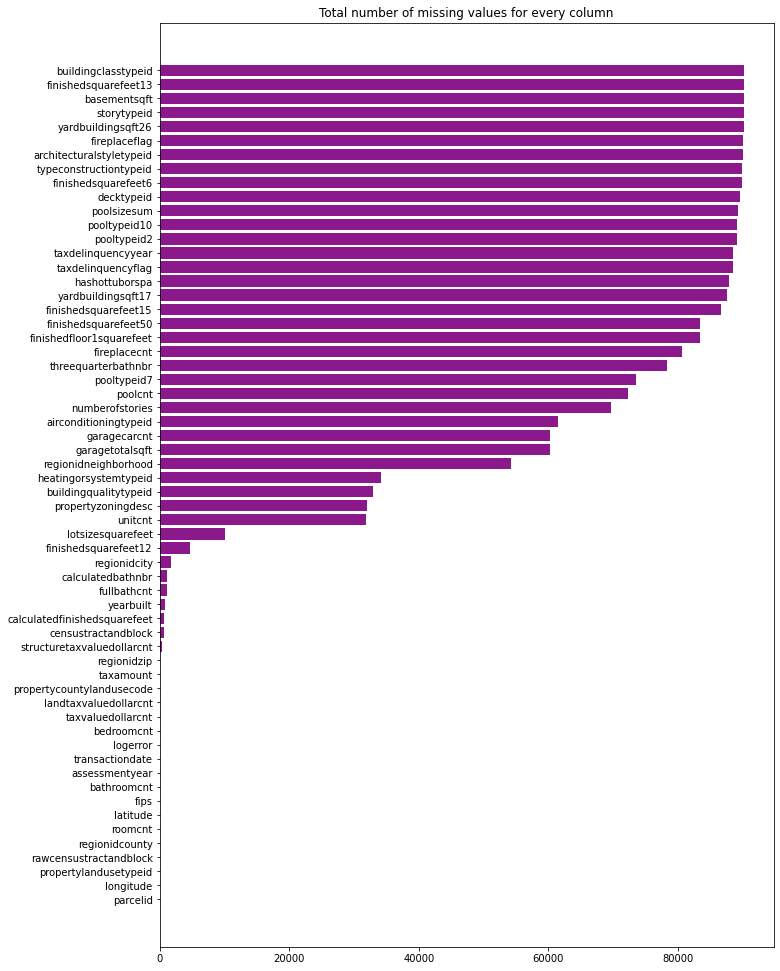

In [48]:
missing_data = merged_train_data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['names', 'counts']
missing_data = missing_data.sort_values(by='counts')

fig, axes = plot.subplots(figsize=(11,17))
axes.barh(np.arange(missing_data.shape[0]), missing_data.counts.values, alpha=0.9,color='purple')
axes.set_title("Total number of missing values for every column")
axes.set_yticks(np.arange(missing_data.shape[0]))
axes.set_yticklabels(missing_data.names.values, rotation='horizontal')
plot.show()

### -> We can see a lot of NaN values from this spreadsheet. Work on this: 

In [49]:
# drop columns with more than 800000 Nan:

missing_data = missing_data.sort_values(by='counts')
missing_data

,names,counts
0,parcelid,0
27,longitude,0
35,propertylandusetypeid,0
37,rawcensustractandblock,0
39,regionidcounty,0
42,roomcnt,0
26,latitude,0
19,fips,0
6,bathroomcnt,0
54,assessmentyear,0


In [50]:
merged_train_data = merged_train_data.drop(['buildingclasstypeid', 'finishedsquarefeet13','basementsqft',
                        'storytypeid','yardbuildingsqft26','fireplaceflag','architecturalstyletypeid',
                       'typeconstructiontypeid','finishedsquarefeet6','decktypeid','poolsizesum',
                       'pooltypeid10','pooltypeid2','taxdelinquencyyear','taxdelinquencyflag',
                       'fireplacecnt','finishedfloor1squarefeet','finishedfloor1squarefeet','finishedsquarefeet50',
                       'finishedsquarefeet15','yardbuildingsqft17','hashottuborspa'], axis=1)

In [51]:
# fill with mean value: 
merged_data_means = merged_train_data.mean(axis=0)
merged_train_data = merged_train_data.fillna(merged_data_means)
merged_train_data = merged_train_data.fillna('Empty')
merged_train_data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.028,2016-01-01,1.000,2.0,3.0,4.000,2.0,1684.0,1684.0,...,1.009,1.00,1959.0,1.441,122754.0,360170.0,2015.0,237416.0,6735.88,6.037e+13
1,14366692,-0.168,2016-01-01,1.816,3.5,4.0,5.565,3.5,2263.0,2263.0,...,1.000,1.11,2014.0,1.441,346458.0,585529.0,2015.0,239071.0,10153.02,6.049e+13
2,12098116,-0.004,2016-01-01,1.000,3.0,2.0,4.000,3.0,2217.0,2217.0,...,1.009,1.00,1940.0,1.441,61994.0,119906.0,2015.0,57912.0,11484.48,6.037e+13
3,12643413,0.022,2016-01-02,1.000,2.0,2.0,4.000,2.0,839.0,839.0,...,1.009,1.00,1987.0,1.441,171518.0,244880.0,2015.0,73362.0,3048.74,6.037e+13
4,14432541,-0.005,2016-01-02,1.816,2.5,4.0,5.565,2.5,2283.0,2283.0,...,1.000,1.11,1981.0,2.000,169574.0,434551.0,2015.0,264977.0,5488.96,6.059e+13


## 2.2 Multicolinarity (multivariate dependence - VIF): 

In [52]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# 使用difference方法，它返回的是索引的差集
df_num_X = merged_train_data[merged_train_data.columns.difference(['hashottuborspa', 
                                                              'propertycountylandusecode', 
                                                              'propertyzoningdesc', 
                                                              'fireplaceflag', 
                                                              'taxdelinquencyflag',
                                                              'transactiondate',
                                                              'logerror'])] 
                                                            # remove all non-numerical features and y, in PCA


X_variables = df_num_X
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [54]:
# calculated the VIF for my X variables:
vif_data

,feature,VIF
0,airconditioningtypeid,1.255
1,assessmentyear,0.000
2,bathroomcnt,25.263
3,bedroomcnt,2.577
4,buildingqualitytypeid,1.292
5,calculatedbathnbr,83.200
6,calculatedfinishedsquarefeet,18.743
7,censustractandblock,94.638
8,finishedsquarefeet12,16.047
9,fips,13002.011


### -> variables with very higher are highly corelated with other varibles -> multi-collinearity -> remove from the model (* Generally, the threshold is 5.).

## 2.3 Then delete those highly-correlated variables (it's part of Feature Selection):

In [55]:
# 使用difference方法，它返回的是索引的差集
merged_train_data_nomul = merged_train_data[merged_train_data.columns.difference(['bathroomcnt', 
                                                              'calculatedbathnbr', 
                                                              'calculatedfinishedsquarefeet', 
                                                              'censustractandblock', 
                                                              'finishedfloor1squarefeet',
                                                              'finishedsquarefeet12',
                                                              'finishedsquarefeet15',
                                                              'finishedsquarefeet50',
                                                              'fips',
                                                              'fullbathcnt',
                                                              'landtaxvaluedollarcnt',
                                                              'rawcensustractandblock',
                                                              'regionidcounty',
                                                              'structuretaxvaluedollarcnt',
                                                              'taxamount',
                                                              'taxvaluedollarcnt'])] 
                                                            # remove all non-numerical features and y, in PCA

In [56]:
merged_train_data_nomul.shape

(90275, 26)

### * Of couere, more work on feature selection (e.g., stepwise regression) can be done hear, if more data is given. 

# 3. Model Build

### * CatBoost can automatically deal with sophiscated categorical variables, using mean-encoding. 

In [57]:
!pip install ipywidgets

## 3.1 Find all catogorical variables: 

In [58]:
data_type = merged_train_data_nomul.dtypes.reset_index()
data_type.columns = ["Count", "Data Type"]
data_type.groupby("Data Type").aggregate('count').reset_index()

# store labels of all numerical varibales:
cate_X = data_type.loc[data_type['Data Type'] == 'object']
categorical_features = cate_X['Count'].values
categorical_features

array(['propertycountylandusecode', 'propertyzoningdesc'], dtype=object)

## 3.2 Create a Validation Dataset:

In [59]:
y = merged_train_data_nomul['logerror']
X = merged_train_data_nomul[merged_train_data_nomul.columns.difference(['logerror','transactiondate'])] 
                                                                    # 'transactiondate' is not a variable

In [60]:
from sklearn.model_selection import train_test_split
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [61]:
X_train.shape, y_train.shape, y_train.shape, y_test.shape, X_test.shape

((72220, 24), (72220,), (72220,), (18055,), (18055, 24))

## 3.3 Train Model:

In [62]:
import numpy as np
from catboost import Pool, CatBoostRegressor

# specify the training parameters 
    ## https://catboost.ai/en/docs/references/training-parameters/common#learning_rate
model = CatBoostRegressor(iterations=50, # if too large -> maybe overfitting + long run time
                          learning_rate=0.05, # the default value is 0.03
                          cat_features=categorical_features,  # categorical_features_indices
                          loss_function='MAPE') 

ModuleNotFoundError: No module named 'catboost'

In [ ]:
model.fit(
        X_train, y_train,
        verbose_eval=100, 
        early_stopping_rounds=50,
        eval_set=(X_test, y_test),
        use_best_model=False,
        plot=True
);

In [ ]:
# Get predictions
preds = model.predict(X_test)
preds

In [ ]:
type(preds)

In [ ]:
preds=pd.DataFrame(preds)
preds

# 4. Evalution:

## 4.1 Performance Evaluation (MAE):

In [ ]:
y_test

In [ ]:
type(y_test)

### -> MAE:

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

# 5. Model Explanation with SHAP

In [63]:
# https://www.kaggle.com/mcsweena/feature-importance-with-catboost-and-shap
import shap

ModuleNotFoundError: No module named 'shap'

In [41]:
shap.initjs()

In [42]:
explainer = shap.TreeExplainer(model)

In [44]:
shap_values = explainer.shap_values(Pool(X_train, y_train, cat_features=categorical_features))

### First, let's take some rows at random and look at the shapley contribution each feature made to each prediction:

In [56]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

### -> Row 0 output is lower than the model baseline - this means the row would be predicted as being 0. What's contributing to this? Well propertycountylanduseconds and xxx appear to have the largest negative impact on the output, while bedroomcnt has the largest positive impact. Outside of bedroomcnt, no other features are having any meaningful positive impact on the predcition.

### To get a deeper insight into what's actually going on here, decoding the features back into their original states might shed some more light:

In [46]:
shap.force_plot(explainer.expected_value, shap_values[4,:], X_train.iloc[4,:])

- Row 4 output is higher than the baseline. So, what's contributing to this? ...

### This would be a long, long process to run through this exercise with many rows. So to speed up the insights, lets stack a number of them horizontally and see what we get:

In [47]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[0:50,:], X_train.iloc[0:50,:])

- It gives a great visual representation of how different values affect predictions. It also highlights certain rows to look into deeper using the single row view above.

## Feature Importance: 

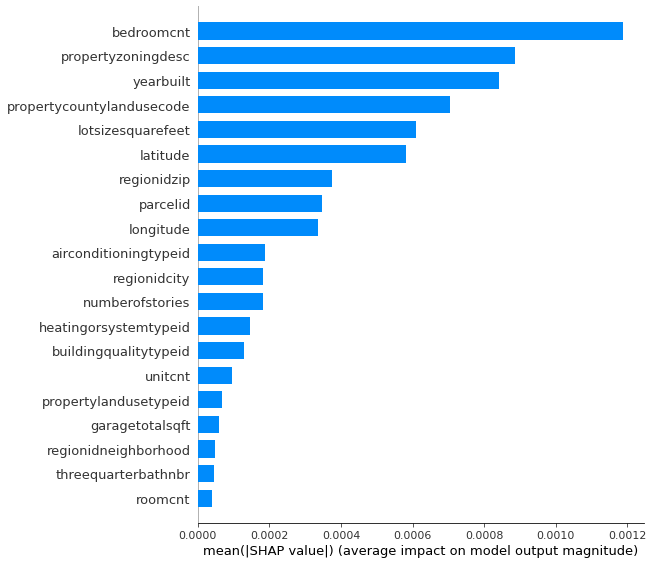

In [57]:
# feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

- Ok, so the most importance features in this model are bedroomcnt, ...

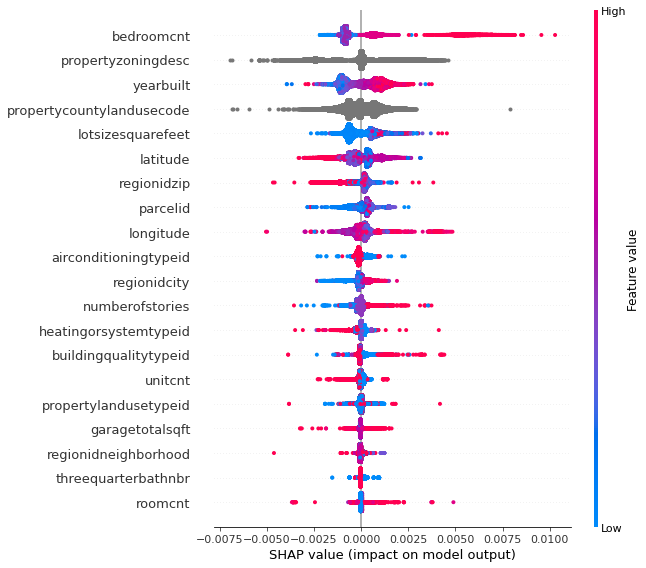

In [58]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

### First, a quick recap as to what's going on in this plot. The plot shows a cumulation of many dots. The dots have 3 characteristics:
- 1. The vertical location of the dots show what feature they are depicting
- 2. Color shows whether that feature value was high or low for that row of the dataset
- 3. Horizontal location shows whether the effect of that value caused a higher or lower prediction.

### Let's look at some features in particular: 
- The feature "bedroomcnt" has the largest impact on the model and interestingly the higher the value, the more positive the contribution the feature gave to the model prediction. 
- The feature "roomcnt" has very little impact on the models predictions. When this feature is with very low values (0 or 1), it has almost NO impact on the model prediction; but if the value is higher, it may have either negative or positive impact on the model prediction. 